In [1]:
def MyColorJitter(ColorJitter):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def forward(self, sample):
        sample[0] = super().forward(sample[0])
        return sample

In [3]:
MyColorJitter(2,3,4)

TypeError: MyColorJitter() takes 1 positional argument but 3 were given

In [2]:
import sys
sys.path.append('/home/freej/Repos/AML-HGF/task3')
import numpy as np
import elasticdeform.torch as etorch
import elasticdeform
from utils import load_zipped_pickle, display_datapoint
from dataset import MitralValveDataset
from configs.preprocess_configs import preprocess_configs
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
p_config = preprocess_configs['simple']
dataset = MitralValveDataset("data/train.pkl", p_config)

Images shift left and right
Are also sometimes rotated
But the source is always at the upper edge
The cone is sometimes wider and sometimes narrower

In [4]:
for i in range(len(dataset)):
    X = dataset.__getitem__(i)[0].numpy()
    plt.imshow(np.moveaxis(X, 0, 2), cmap='gray')
    plt.show()
    input()
    clear_output(wait=True)

NotImplementedError: 

In [13]:
X, y = dataset.__getitem__(i)[0].numpy(), dataset.__getitem__(i)[1].numpy()

In [14]:
zoom = 0.9
rotate=5
# sigma=10, points=3 From the original U-Net paper
X_zoomed = elasticdeform.deform_random_grid(X, sigma=10, points=3, axis=(1,2),
                                            # crop=crop, 
                                            zoom=zoom, 
                                            rotate=rotate)

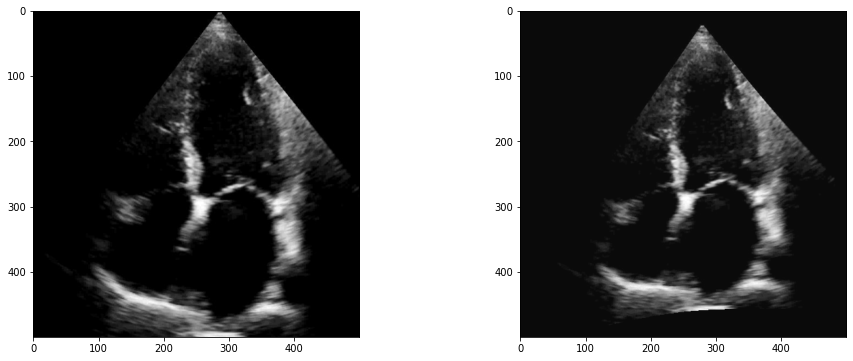

In [39]:
plt.rcParams["figure.figsize"] = (16,6)
plt.subplot(1, 2, 1)
plt.imshow(np.moveaxis(X, 0, 2), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.moveaxis(X_zoomed, 0, 2), cmap='gray')

In [37]:
zoom = 1
rotate = 10
# sigma=10, points=3 From the original U-Net paper
y_zoomed = elasticdeform.deform_random_grid(y, sigma=10, points=3, axis=(1,2),
                                            # crop=crop, 
                                            zoom=zoom, 
                                            rotate=rotate).round()

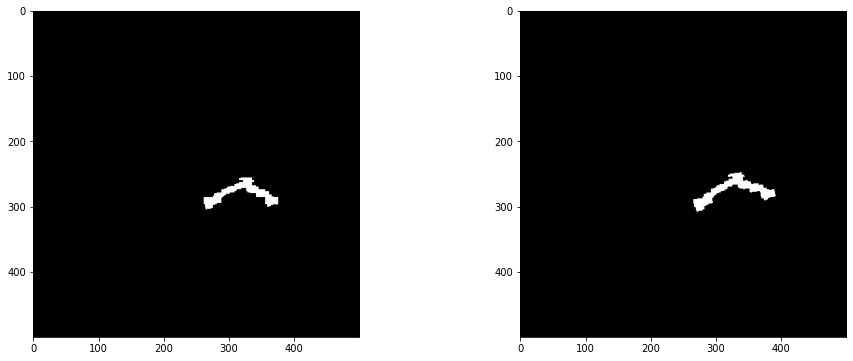

In [38]:
plt.rcParams["figure.figsize"] = (16,6)
plt.subplot(1, 2, 1)
plt.imshow(np.moveaxis(y, 0, 2), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.moveaxis(y_zoomed, 0, 2), cmap='gray')

In [27]:
X.min(), X.max()

(0.0, 255.0)

In [28]:
X_zoomed.min(), X_zoomed.max()

(-10.627608, 255.40944)

In [29]:
y.min(), y.max()

(0.0, 1.0)

In [30]:
y_zoomed.min(), y_zoomed.max()

(0.0, 1.0)